# **Machine Learning Project** : Customer Churn Prediction

### **`Project objective`** : Build a classification model to predict churn (Yes/No) so the company can proactively take action to retain high-risk customers and reduce revenue loss

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df=pd.read_csv("customer_data.csv")

## Dataset Information

### Binary Classification Problem

- independent variable=( customerID,	gender,	SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity	,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract	,PaperlessBilling,PaymentMethod,	MonthlyCharges	,TotalCharges)

- dependent variable: Churn = Yes or No

In [136]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Unnamed: 22
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,NaN,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN,NaN


In [137]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Unnamed: 21         float64
Unnamed: 22         float64
dtype: object

## Data Preprocessing
- Converted TotalCharges to numeric

- Dropped rows with missing values

- Applied Label Encoding and One-Hot Encoding

- Scaled numerical columns using StandardScaler

- Addressed class imbalance using SMOTE



## Data Cleaning & Handling Missing Values
- Ensured no nulls remained using .isnull().sum()
- drop unwanted column

In [138]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
Unnamed: 21         7043
Unnamed: 22         7043
dtype: int64

In [139]:
df.drop(columns=["Unnamed: 21","Unnamed: 22"],inplace=True)

In [140]:
df.shape

(7043, 21)

In [141]:
df = df[df['TotalCharges'].notnull()]


In [142]:
df.drop(columns=["customerID"],inplace=True)

## Outliers & Label Encoding
- Checking outliers in numeric columns
- label encoding to categorical column
- checking count of categorical columns

In [143]:
num_cols=df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [144]:
tac_cols=df.dtypes[df.dtypes=="object"].index
tac_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

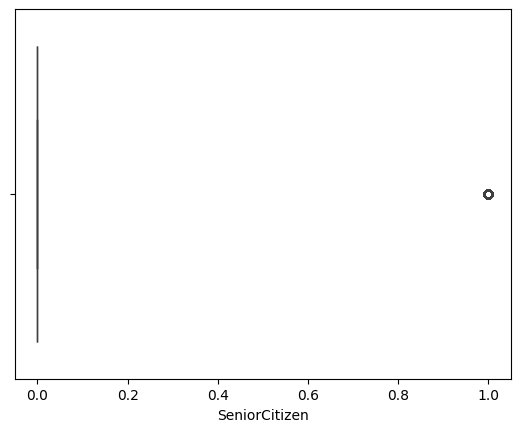

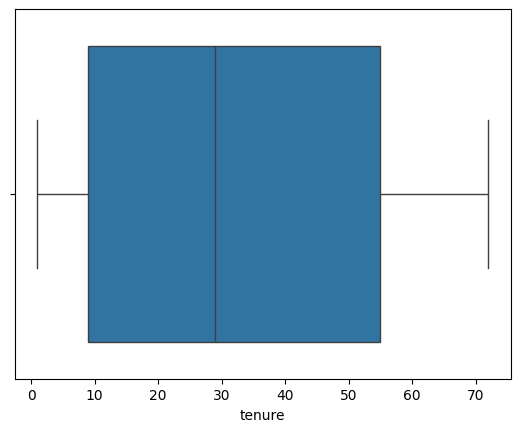

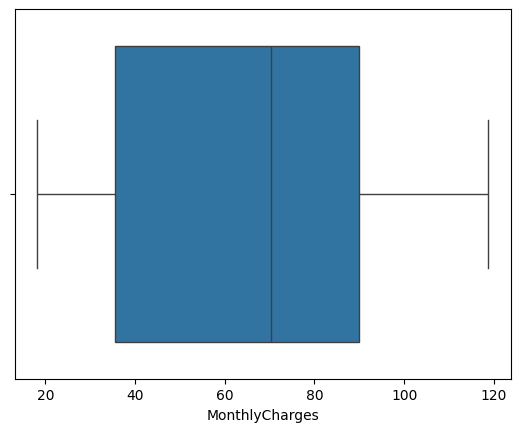

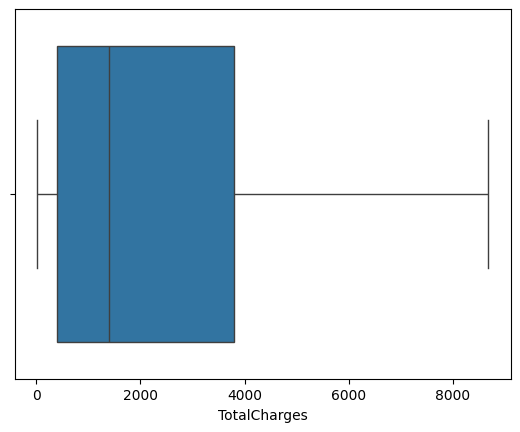

In [145]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.yticks(fontsize=10)
    plt.show()

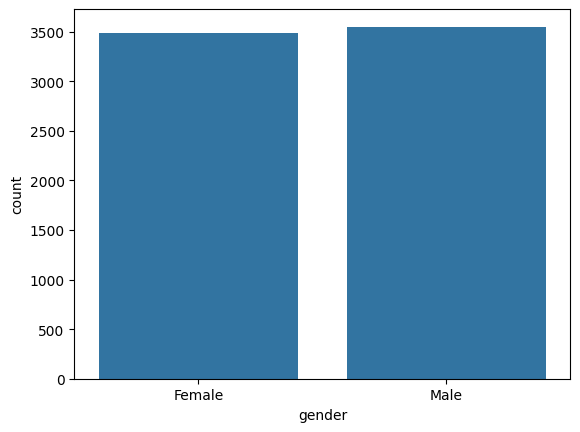

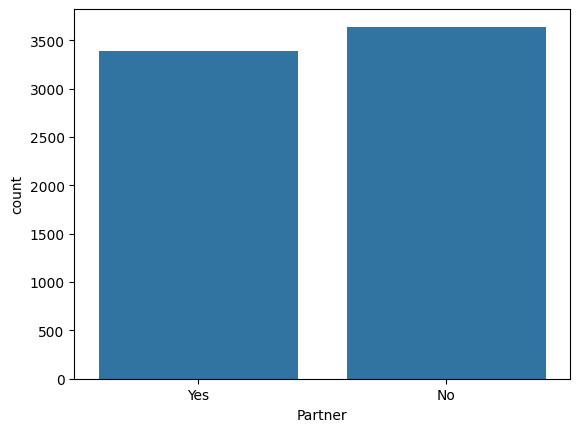

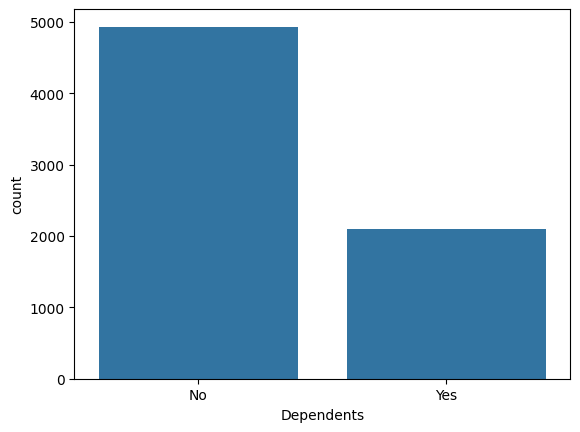

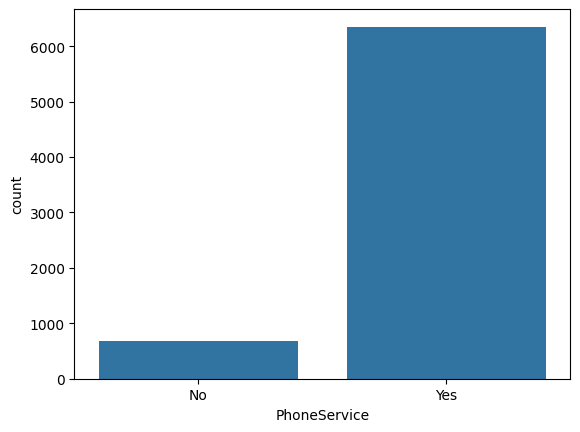

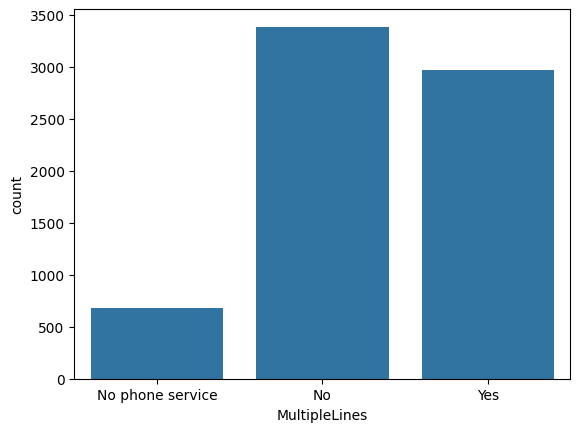

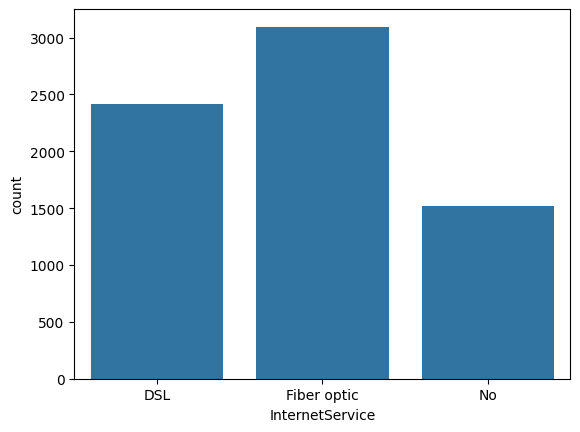

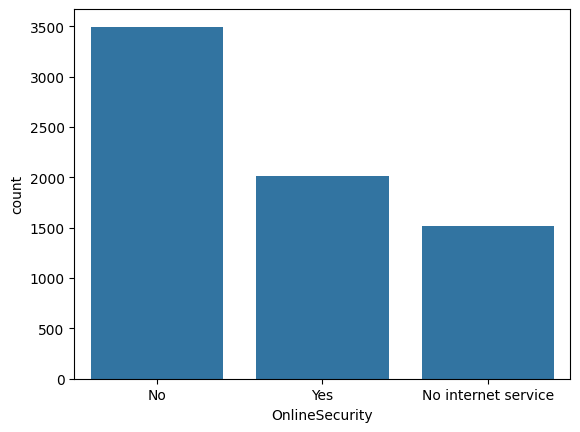

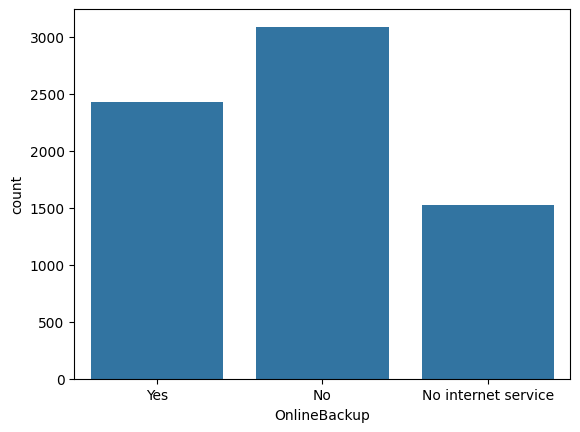

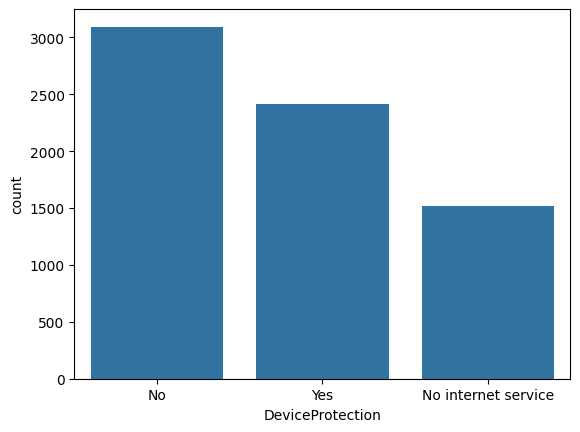

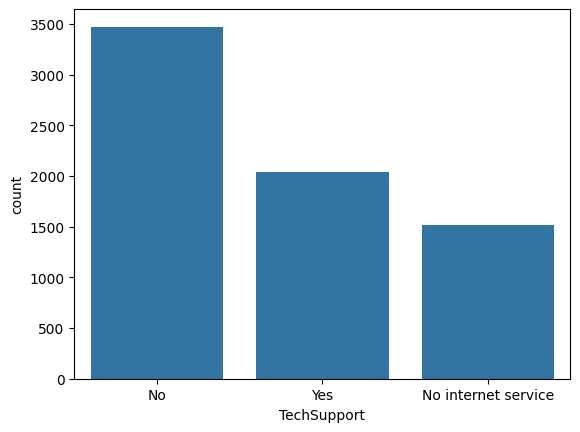

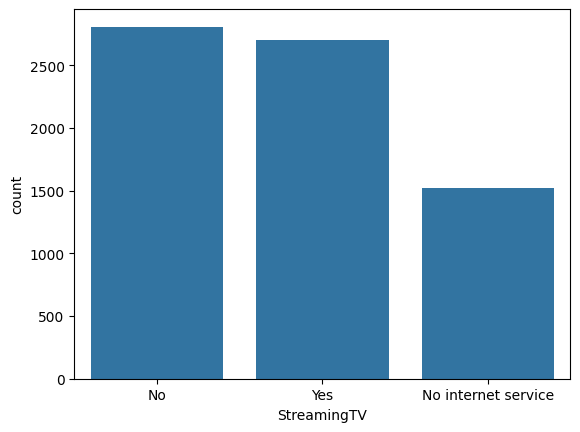

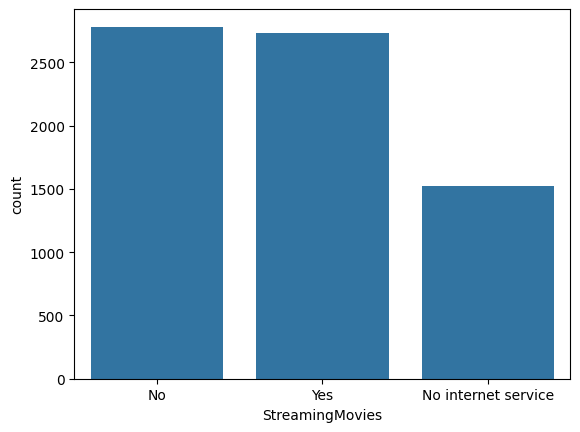

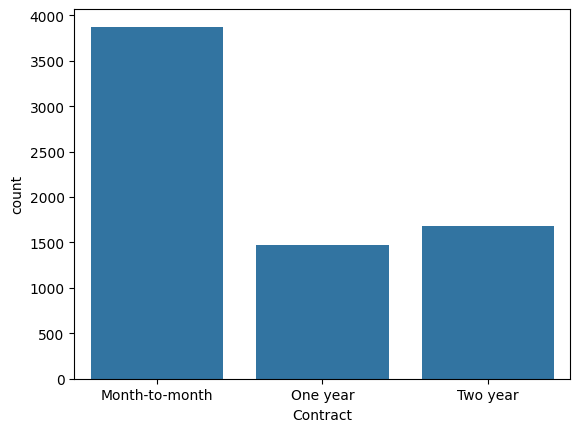

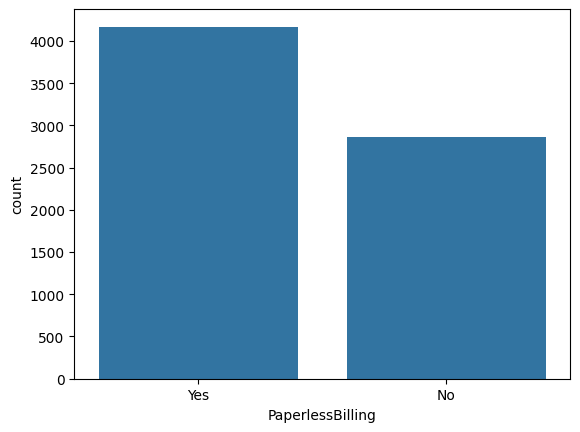

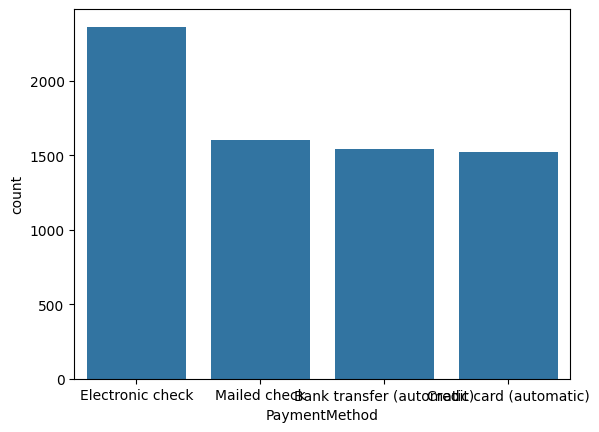

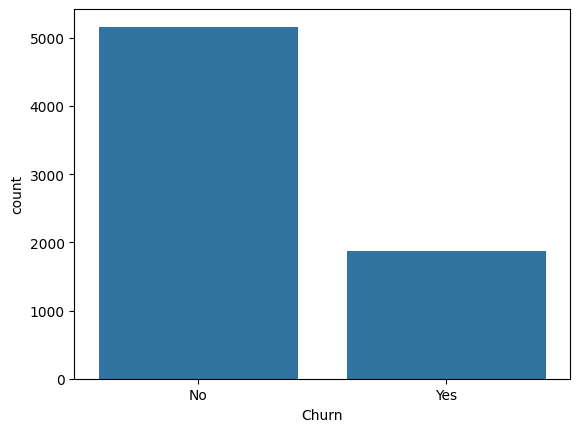

In [146]:
for i in tac_cols:
    sns.countplot(x=df[i])
    plt.yticks(fontsize=10)
    plt.show()

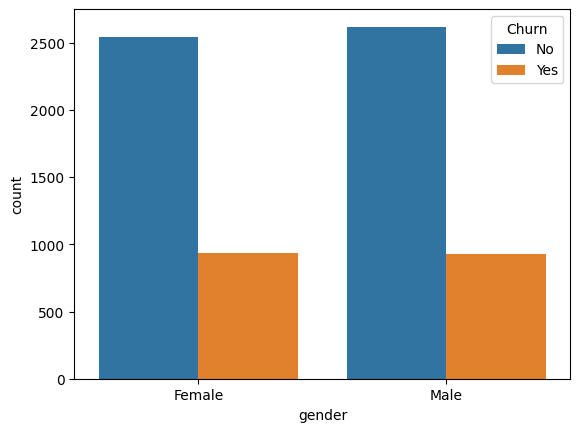

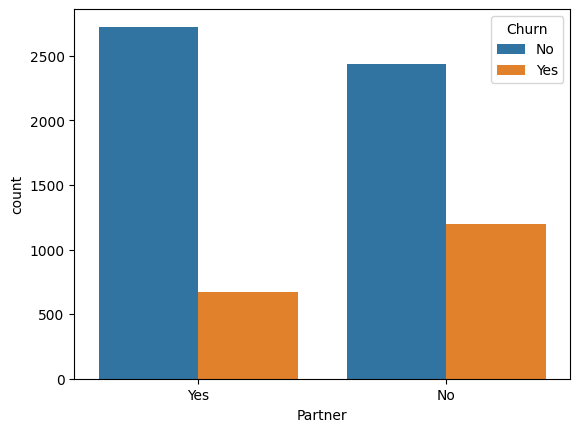

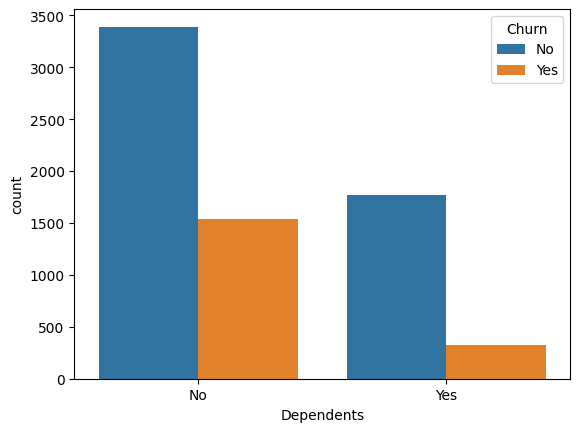

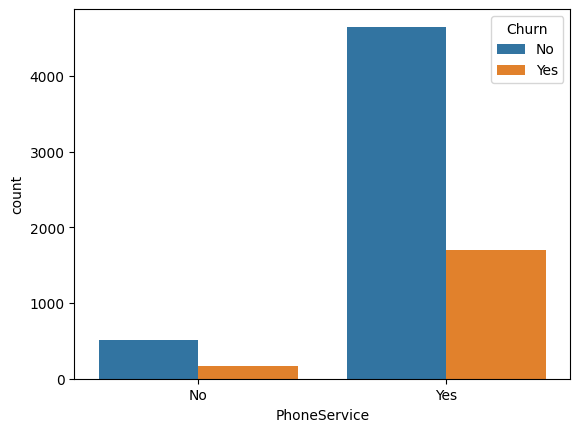

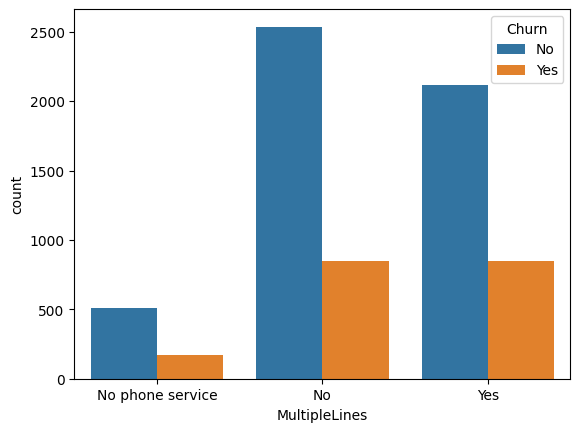

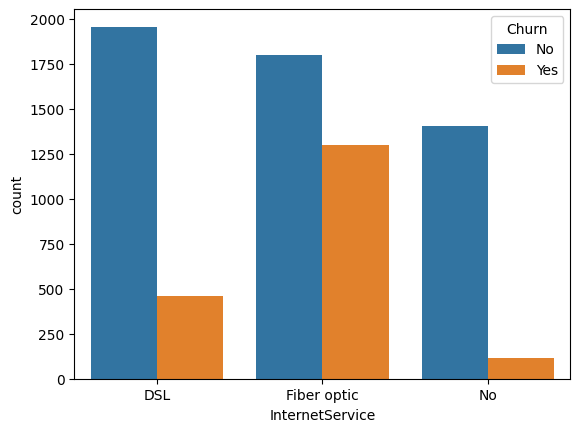

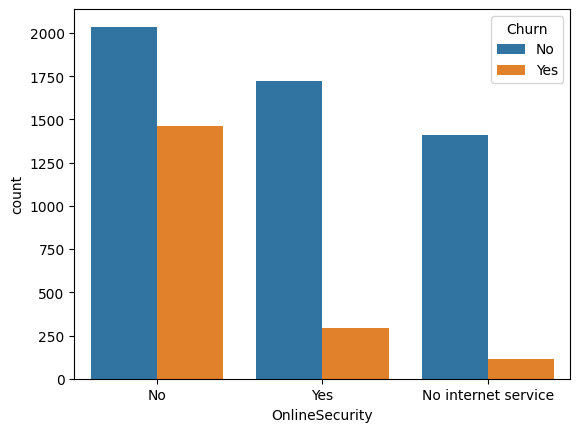

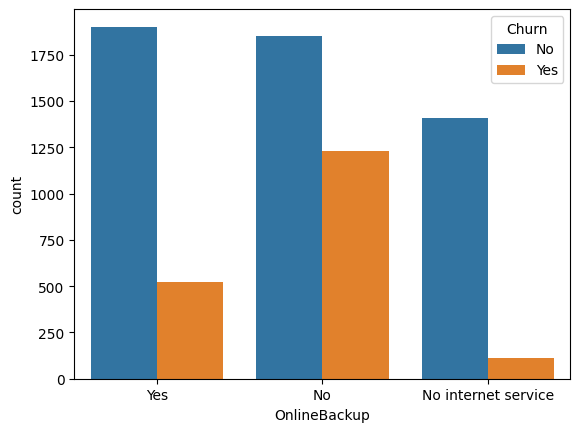

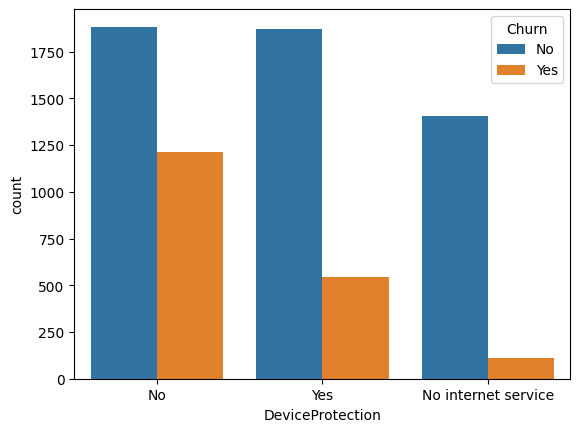

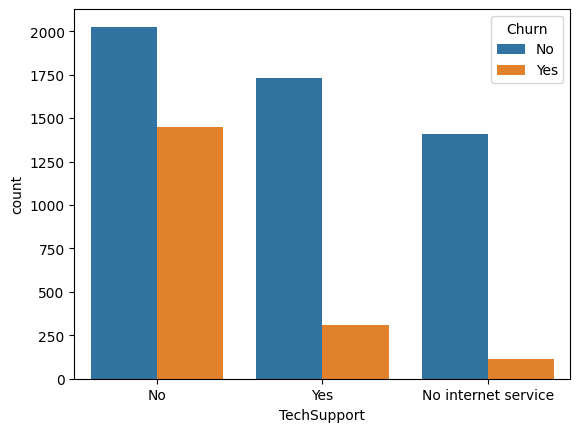

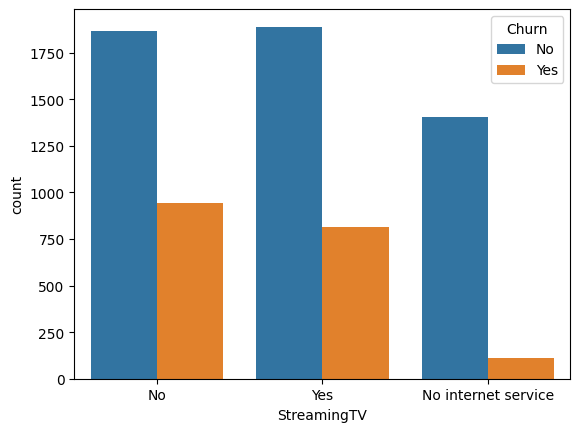

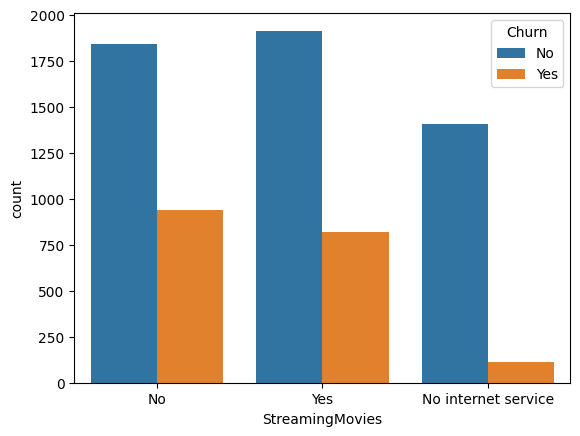

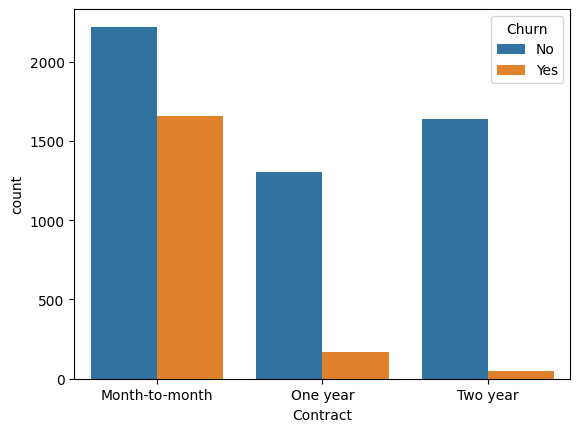

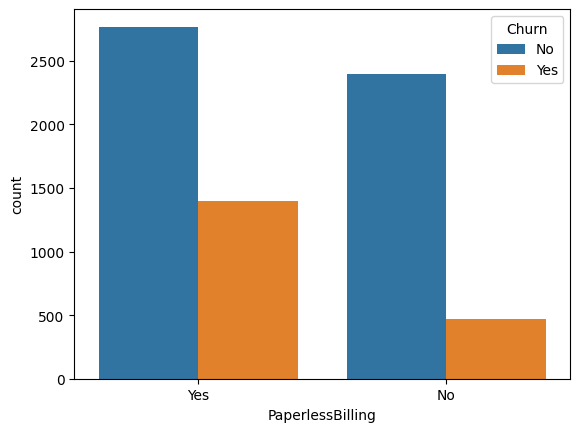

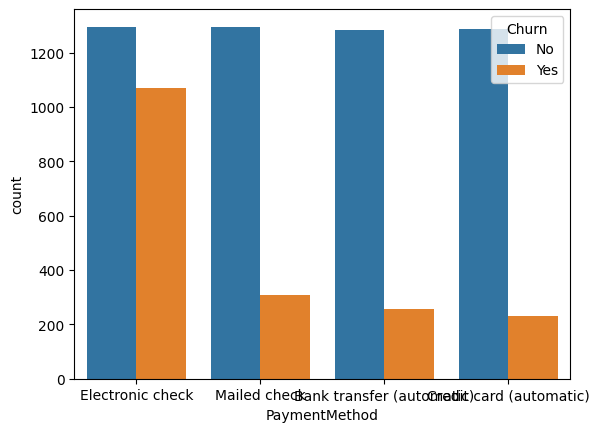

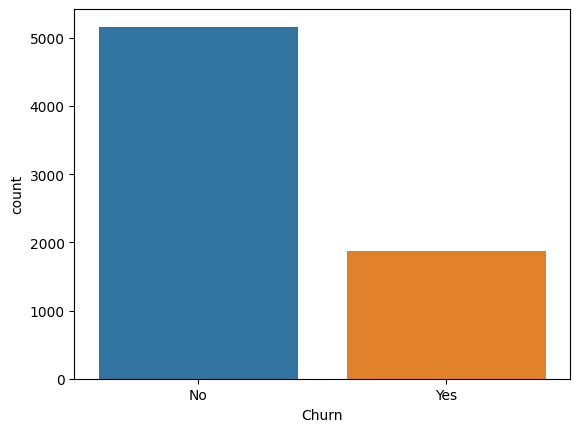

In [147]:
for i in tac_cols:
    sns.countplot(x=df[i],hue="Churn",data=df)
    plt.yticks(fontsize=10)
    plt.show()

### in countplting we find that we are dealing with imbalance data by the count of churn and not churn of independent variable

In [148]:
#label encoding to non numeric data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for cal in tac_cols:
    df[cal]=lb.fit_transform(df[cal])


In [149]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [150]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Ploting correlation

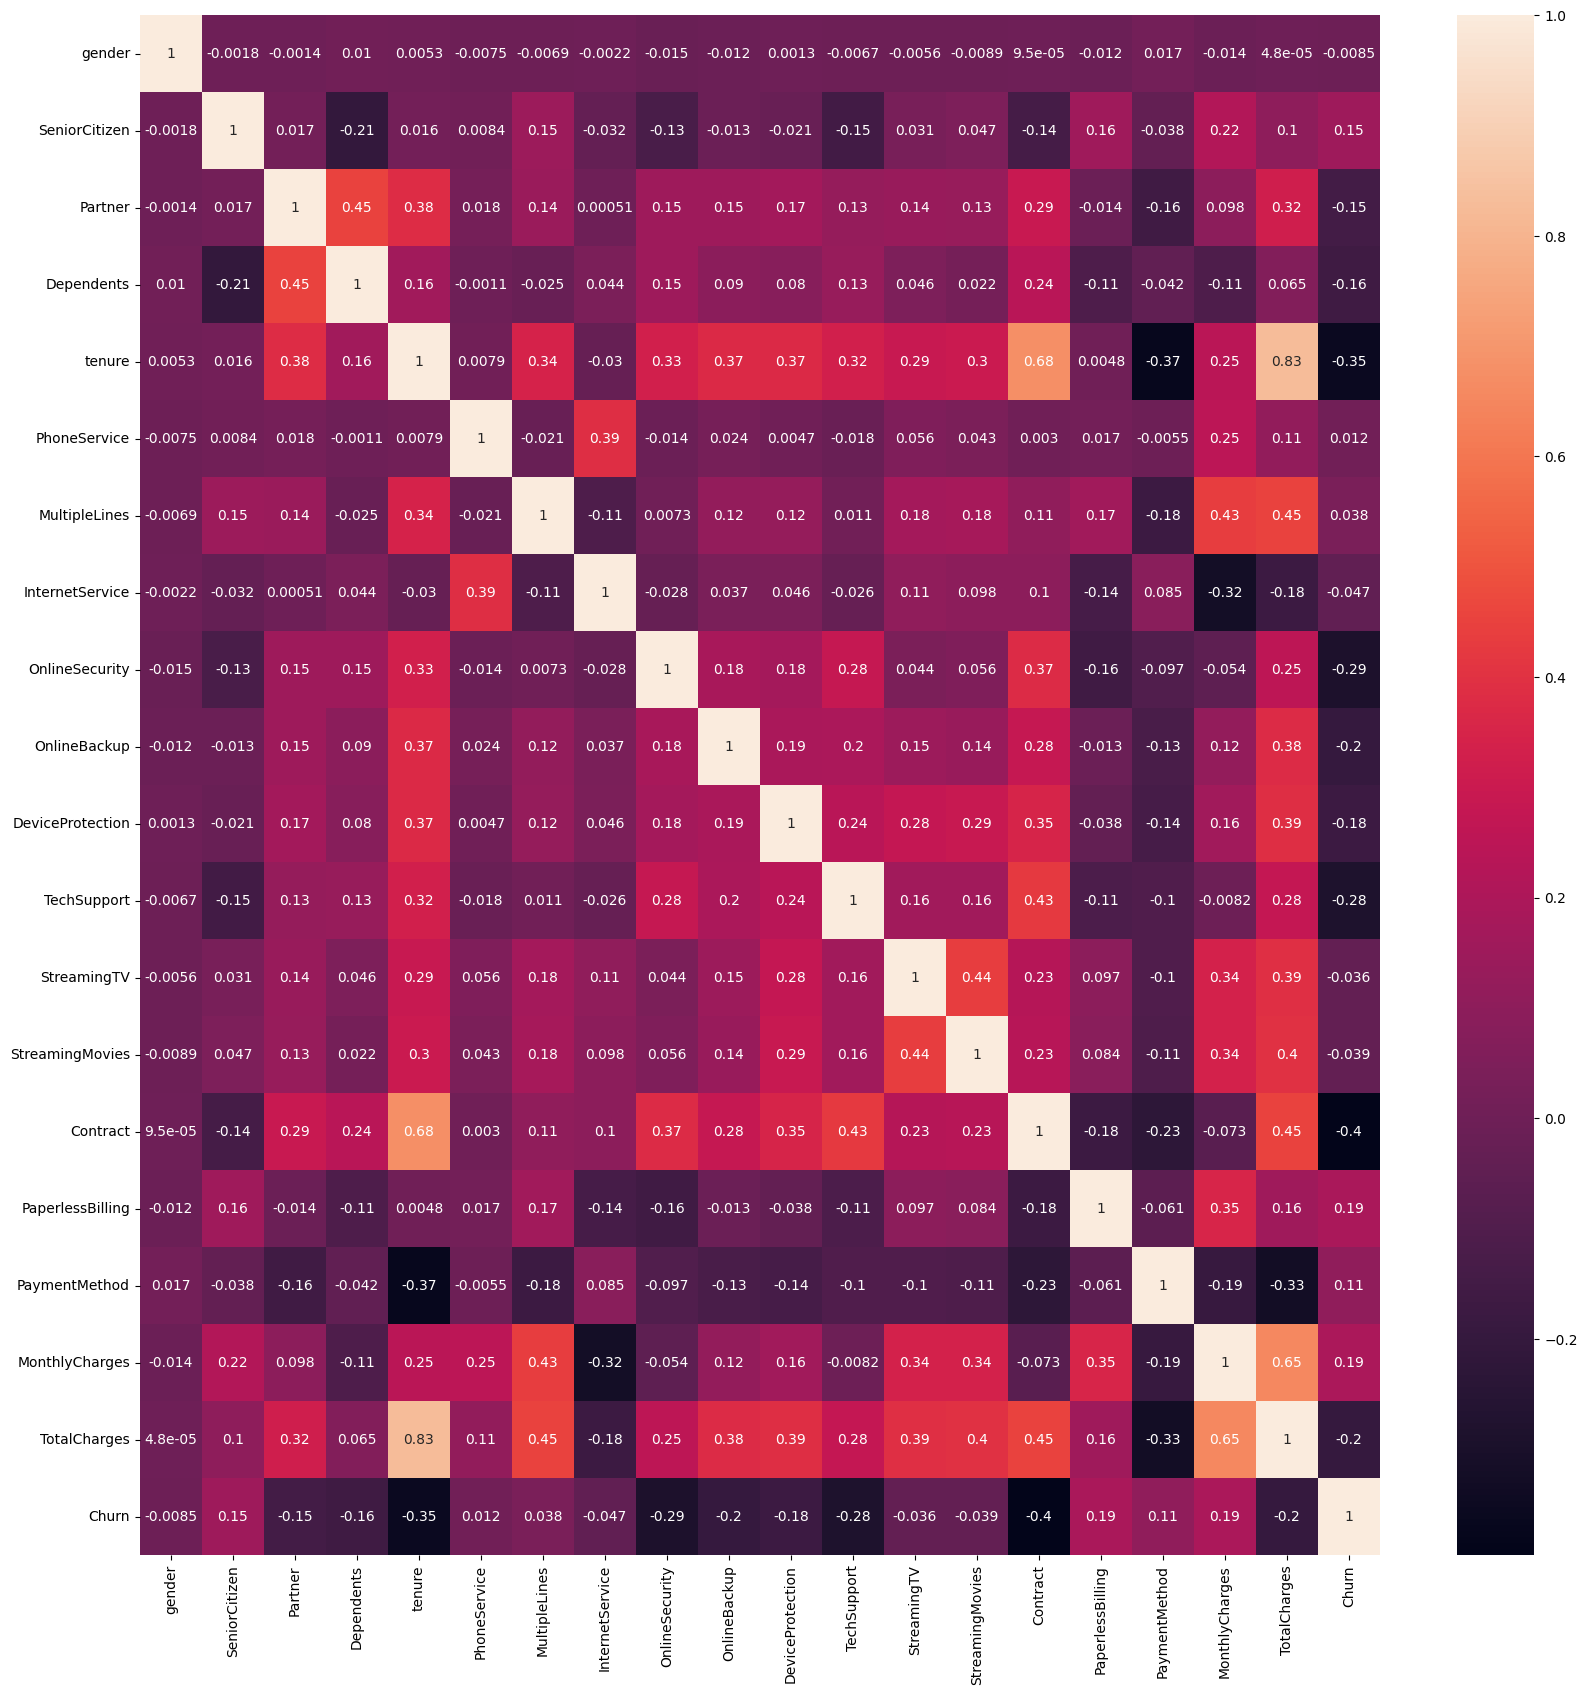

In [151]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

### Feature Scaling especially for Models like KNN and SVM

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


### Splitting the Data in train_test_split

In [153]:
#importing essential library 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

In [154]:
x=df.drop("Churn",axis=1)
y=df["Churn"]
print(x.shape)
print(y.shape)

(7032, 19)
(7032,)


In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 19)
(1407, 19)
(5625,)
(1407,)


## Model Training
- Logistic Regression

- Decision Tree

- Random Forest

- K-Nearest Neighbors

- Support Vector Machine

### training LogisticRegression model with class imbalance

In [156]:
m1=LogisticRegression()
m1.fit(x_train,y_train)

LogisticRegression()

In [157]:
print("Training score",m1.score(x_train,y_train))
print("Testing score",m1.score(x_test,y_test))

Training score 0.8067555555555556
Testing score 0.7860696517412935


In [158]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

[0 0 1 ... 0 0 0]


In [159]:
conf_m1=confusion_matrix(y_test,ypred_m1)
print(conf_m1)
print(classification_report(y_test,ypred_m1))

[[921 112]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



## `Different view - Creating model with imbalance data`
- we can also create model with imbalance which also give us some insight
- data has good amount of count of coustomer which not churn 
- so model will well train on data which will not churn
- so in this way we can predict value for not churn
- and segregate other two high risk data which might churn and focus proacively on that data

## `SMOTE(Synthetic Minority Over-sampling Technique) Step`

### evaluation metrics clearly show that the dataset is imbalanced and Logistic Regression model is biased toward the majority class i.e.  No churn :0
### to handle this imbalance we will use technique **SMOTE**

In [160]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\swapn\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


### training model with SMOTE technique

In [161]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_smp, y_train_smp = smote.fit_resample(x_train, y_train)

lr_model= LogisticRegression(max_iter=1000)
lr_model.fit(x_train_smp, y_train_smp)

LogisticRegression(max_iter=1000)

In [162]:
print("Training score",lr_model.score(x_train_smp,y_train_smp))
print("Testing score",lr_model.score(x_test,y_test))

Training score 0.7818401937046005
Testing score 0.7334754797441365


In [163]:
y_pred = lr_model.predict(x_test)

In [164]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

[[742 291]
 [ 84 290]]


### As we can see in our classification report there is improvement in recall and f1-score value which is good for our prediction as there is less chances of missing false negative value i.e. value whhich are churn but in prediction showing not churn

## Decision tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(x_train_smp, y_train_smp)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [167]:
print("Train Score:", dt_model.score(x_train_smp, y_train_smp))
print("Test Score:", dt_model.score(x_test, y_test))


Train Score: 0.787772397094431
Test Score: 0.7256574271499645


In [168]:

# Step 2: Predict on test set
y_pred_dt1 = dt_model.predict(x_test)

# Step 3: Evaluate the model
print(classification_report(y_test, y_pred_dt1))
print(confusion_matrix(y_test, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1033
           1       0.49      0.73      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407

[[748 285]
 [101 273]]


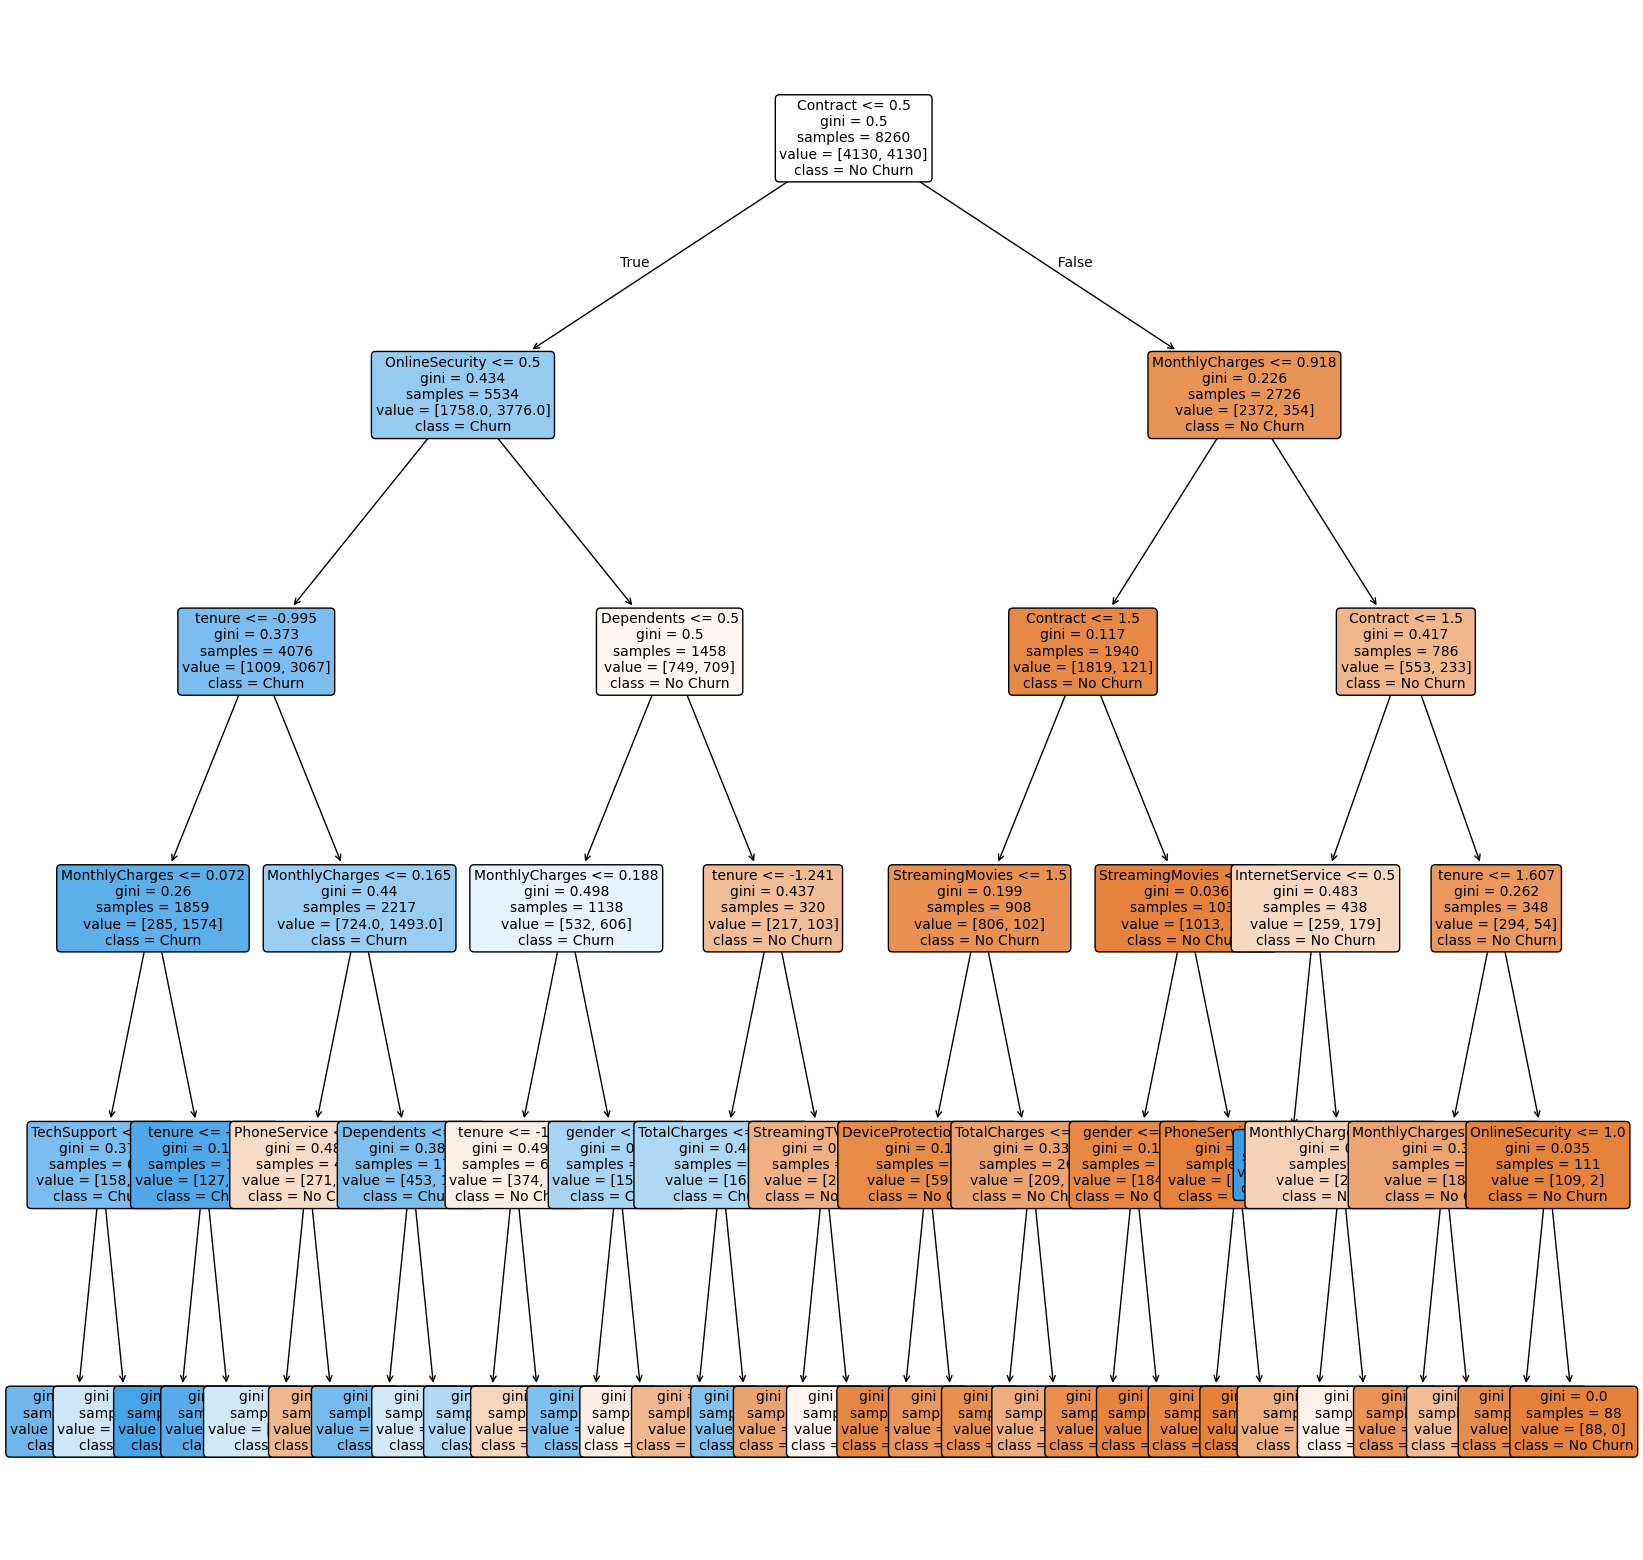

In [169]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt_model, 
          feature_names=x.columns, 
          class_names=['No Churn', 'Churn'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

In [170]:
dt_model1 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [171]:
print("Train Score:", dt_model.score(x_train, y_train))
print("Test Score:", dt_model.score(x_test, y_test))

Train Score: 0.8046222222222222
Test Score: 0.7860696517412935


In [172]:
dt_y_pred=dt_model.predict(x_test)
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



## Random forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rf_model=RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=5, 
                                min_samples_leaf=10,
                                random_state=42) 

rf_model.fit(x_train_smp,y_train_smp)


RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [175]:
rf1=print("Train Score:", rf_model.score(x_train_smp, y_train_smp))
rf2=print("Test Score:", rf_model.score(x_test, y_test))

Train Score: 0.7978208232445521
Test Score: 0.7341862117981521


In [176]:
rf_y_pred=rf_model.predict(x_test)
print(classification_report(y_test, rf_y_pred))


              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



## K-Nearest Neighbors (KNN)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_smp,y_train_smp)

KNeighborsClassifier(n_neighbors=7)

In [178]:
print("Train Score:", rf_model.score(x_train_smp, y_train_smp))
print("Test Score:", rf_model.score(x_test, y_test))

Train Score: 0.7978208232445521
Test Score: 0.7341862117981521


In [179]:
knn_y_pred=knn_model.predict(x_test)
print(classification_report(y_test, knn_y_pred))


              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1033
           1       0.45      0.73      0.56       374

    accuracy                           0.69      1407
   macro avg       0.66      0.70      0.66      1407
weighted avg       0.76      0.69      0.71      1407



## Support Vector Machine (SVM)

In [180]:
from sklearn.svm import SVC

svc_model=SVC(kernel="rbf",probability=True,C=2.0)
svc_model.fit(x_train_smp,y_train_smp)

SVC(C=2.0, probability=True)

In [181]:
print("Train Score:", svc_model.score(x_train_smp, y_train_smp))
print("Test Score:", svc_model.score(x_test, y_test))

Train Score: 0.8291767554479419
Test Score: 0.7434257285003554


In [182]:
svc_y_pred=svc_model.predict(x_test)
print("SVM classification report:")
print(classification_report(y_test,svc_y_pred))

SVM classification report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1033
           1       0.51      0.70      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



## Cross-Validation
- valuated model stability using 5-fold cross-validation

- Focused on recall as the scoring metric

In [183]:
from sklearn.model_selection import cross_val_score

svm_val=cross_val_score(svc_model, x_train_smp, y_train_smp, scoring='recall', cv=5)
print(f'Array of  recall scores:{(svm_val)}')
print(f'Mean recall :{svm_val.mean()}')
print(f'Staandard deviation of recall:{svm_val.std()}')
print(svm_val.std())

Array of  recall scores:[0.76150121 0.78329298 0.87893462 0.87893462 0.86561743]
Mean recall :0.8336561743341404
Staandard deviation of recall:0.05072393621219124
0.05072393621219124


In [184]:
knn_val=cross_val_score(knn_model, x_train_smp, y_train_smp, scoring='recall', cv=5)
print(f'Array of  recall scores:{(knn_val)}')
print(f'Mean recall :{knn_val.mean()}')
print(f'Staandard deviation of recall:{knn_val.std()}')

Array of  recall scores:[0.8401937  0.86682809 0.91162228 0.93099274 0.94309927]
Mean recall :0.8985472154963681
Staandard deviation of recall:0.039037905249947005


In [185]:
dt_val=cross_val_score(dt_model, x_train_smp, y_train_smp, scoring='recall', cv=5)
print(f'Array of  recall scores:{dt_val}')
print(f'Mean recall  : {dt_val.mean()}')
print(f'Staandard deviation of recall : {dt_val.std()}')

Array of  recall scores:[0.76513317 0.81234867 0.84624697 0.8401937  0.80992736]
Mean recall  : 0.8147699757869249
Staandard deviation of recall : 0.0287412362725887


In [186]:
rf_val=cross_val_score(rf_model, x_train_smp, y_train_smp, scoring='recall', cv=5)
print(f'Array of  recall scores:{rf_val}')
print(f'Mean recall  : {rf_val.mean()}')
print(f'Staandard deviation of recall : {rf_val.std()}')

Array of  recall scores:[0.79661017 0.82808717 0.86319613 0.87651332 0.84624697]
Mean recall  : 0.8421307506053267
Staandard deviation of recall : 0.027972128109737697


In [187]:
lr_val=cross_val_score(lr_model, x_train_smp, y_train_smp, scoring='recall', cv=5)
print(f'Array of  recall scores:{lr_val}')
print(f'Mean recall : {lr_val.mean()}')
print(f'Staandard deviation of recall: {lr_val.std()}')

Array of  recall scores:[0.7566586  0.81476998 0.85956416 0.86803874 0.84745763]
Mean recall : 0.8292978208232444
Staandard deviation of recall: 0.040581287164388385


- **Logistic Regression**              
- Training score : 0.7818401937046005    
- Testing score : 0.7334754797441365     
- cross-validation recall: 0.83          

- **Random Forest**
- Train Score: 0.7978208232445521
- Test Score: 0.7341862117981521
- cross-validation recall: 0.85

- **Decision tree**
- Train Score: 0.8046222222222222
- Test Score: 0.7860696517412935
- cross-validation recall: 0.81

- **SVM**
- Train Score: 0.8291767554479419
- Test Score: 0.7434257285003554
- cross-validation recall: 0.83

- **KNN**
- Train Score: 0.7978208232445521
- Test Score: 0.7341862117981521
- cross-validation recall :0.89



## Chosen Model: **Random Forest**
- Highest recall and F1-score

- Strong cross-validation recall (84.6%)

- Suited for Best balance of performance for providing business value and fulfilling objective

- no  knn and decision tree as knn is unstable and it will not provide good result in real world data while decision tree model shown overfitting

## ploting parameter affecting churn

<Axes: xlabel='tenure', ylabel='Count'>

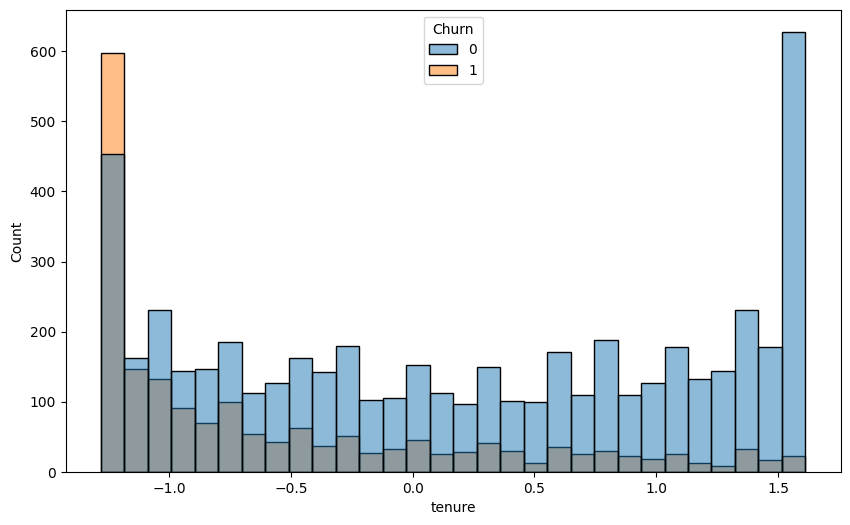

In [188]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

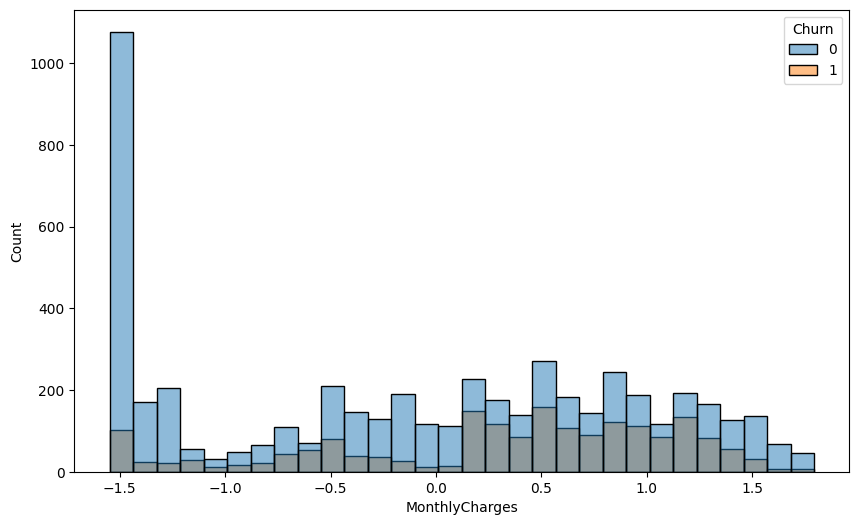

In [189]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30)

# Business Recommendations

- Customers with month-to-month contracts have high chances of churn focus on soving this issue

- Customers with Short tenure churn doing campaign on increase retention of customer

- from count plot find that customer don't have online security also have moderate churn rate so we can also focus on that

- implementing random forest model for generalise ,stable prediction of churn rate

- for better churn prediction company should create model based on xgboost

# Loom video link
https://www.loom.com/share/ffebb1d8290b4fa49f9ddf0a7e801680?sid=01b60641-0d3b-48fa-87f9-78e08a7ff652

# Drive video link
https://drive.google.com/file/d/1ZTV1QqYz4nT1nHJSMLAW7N5uHLAfuFvd/view?usp=sharing
### video is of five minute but extended due to screen recording of loom video